# IMPORTING THE LIBRARIES

In [35]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ACCESSING THE DATASET

In [87]:
#convert movie.dat file to csv file
input_file_path = "movies.dat"
output_file_path = "output_file.csv"
data_movie = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)
data_movie.to_csv(output_file_path, index=False)
data_movie.head(20)

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [88]:
data_movie.columns =['MovieIDs','MovieName','Genre']
data_movie.dropna(inplace=True)
data_movie.head()

,MovieIDs,MovieName,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [89]:
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MovieIDs   3883 non-null   int64 
 1   MovieName  3883 non-null   object
 2   Genre      3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [90]:
data_movie.shape

(3883, 3)

In [91]:
data_movie.describe()

,MovieIDs
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [92]:
data_movie.isnull().sum()

MovieIDs     0
MovieName    0
Genre        0
dtype: int64

In [93]:
#converting ratings.dat file to csv
input_file_path = "ratings.dat"
output_file_path = "output_file.csv"
data_rating = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)
data_rating.to_csv(output_file_path, index=False)
data_rating.head(20)

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [94]:
data_rating.columns =['ID','MovieID','Ratings','TimeStamp']
data_rating.dropna(inplace=True)
data_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [95]:
data_rating.shape

(1000209, 4)

In [96]:
data_rating.describe()

,ID,MovieID,Ratings,TimeStamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [97]:
data_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   ID         1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Ratings    1000209 non-null  int64
 3   TimeStamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [98]:
data_rating.isnull().sum()

ID           0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [99]:
#converting user.dat file to csv file
input_file_path = "users.dat"
output_file_path = "output_file.csv"
data_user = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)
data_user.to_csv(output_file_path, index=False)
data_user.head(20)

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [100]:

data_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
data_user.dropna(inplace=True)
data_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [101]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [102]:
data_user.shape

(6040, 5)

In [103]:
data_user.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [104]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data_user['Gender']= labelencoder.fit_transform(data_user['Gender'])

data_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455


In [105]:
data_user.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

# Combining all the data sets

In [106]:
data_da=pd.concat([data_movie,data_rating,data_user],axis=1)
data_da.dropna()
data_da.head(10)

,MovieIDs,MovieName,Genre,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,0.0,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
5,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,0.0,50.0,9.0,55117
6,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,1.0,35.0,1.0,06810
7,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,1.0,25.0,12.0,11413
8,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,1.0,25.0,17.0,61614
9,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,0.0,35.0,1.0,95370


In [107]:
data_da.shape

(1000209, 12)

In [108]:
df=data_da.drop(["Occupation","Zip-code","TimeStamp"],axis=1)
df.head()

,MovieIDs,MovieName,Genre,ID,MovieID,Ratings,UserID,Gender,Age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,0.0,1.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0


In [109]:
df.describe()

,MovieIDs,ID,MovieID,Ratings,UserID,Gender,Age
count,3883.000000,1.000209e+06,1.000209e+06,1.000209e+06,6040.000000,6040.000000,6040.000000
mean,1986.049446,3.024512e+03,1.865540e+03,3.581564e+00,3020.500000,0.717053,30.639238
std,1146.778349,1.728413e+03,1.096041e+03,1.117102e+00,1743.742145,0.450468,12.895962
min,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,1.000000
25%,982.500000,1.506000e+03,1.030000e+03,3.000000e+00,1510.750000,0.000000,25.000000
50%,2010.000000,3.070000e+03,1.835000e+03,4.000000e+00,3020.500000,1.000000,25.000000
75%,2980.500000,4.476000e+03,2.770000e+03,4.000000e+00,4530.250000,1.000000,35.000000
max,3952.000000,6.040000e+03,3.952000e+03,5.000000e+00,6040.000000,1.000000,56.000000


# INSPECTING THE DATASET

In [111]:
df.isna().sum()

MovieIDs     996326
MovieName    996326
Genre        996326
ID                0
MovieID           0
Ratings           0
UserID       994169
Gender       994169
Age          994169
dtype: int64

In [112]:
data_final=df.dropna()

In [113]:
data_final.shape

(3883, 9)

# PLOTTING THE DATA

<Axes: xlabel='Gender', ylabel='count'>

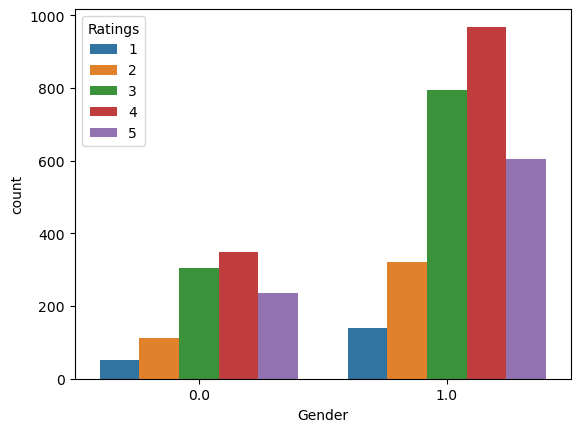

In [114]:
sns.countplot(x=data_final['Gender'],hue=data_final['Ratings'])

Text(0.5, 0, 'Ratings')

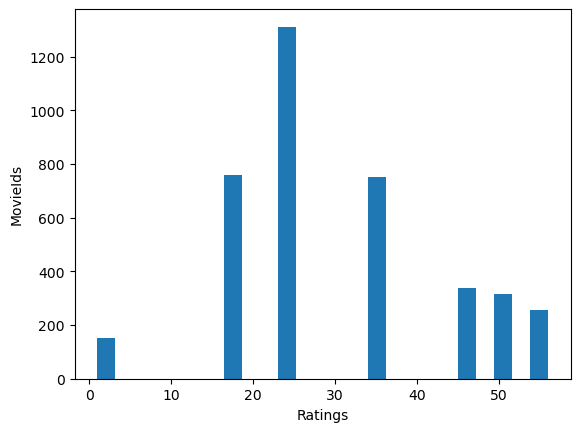

In [115]:
data_final.Age.plot.hist(bins=25)
plt.ylabel("MovieIds")
plt.xlabel("Ratings")
     

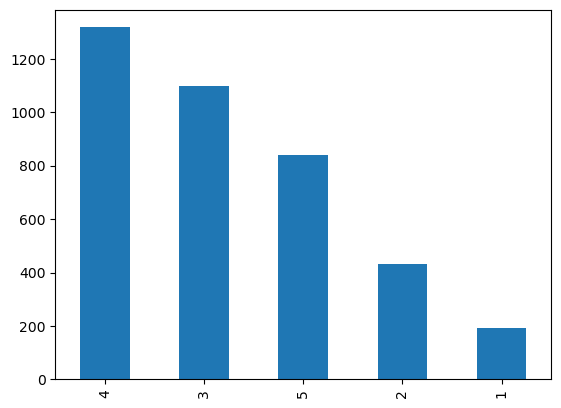

In [116]:

data_final['Ratings'].value_counts().plot(kind='bar')
plt.show()

Text(0, 0.5, 'Ratings')

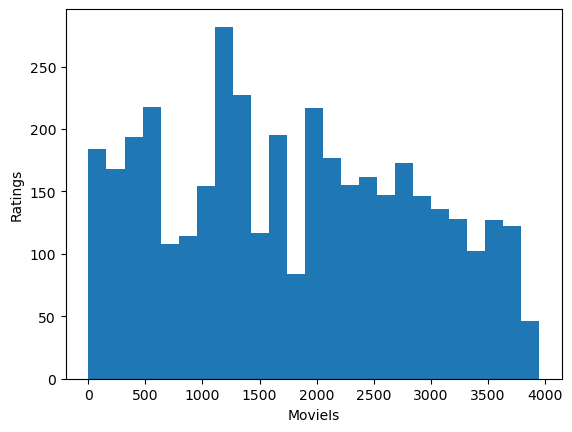

In [117]:
data_final['MovieID'].plot.hist(bins=25)
plt.xlabel("MovieIs")
plt.ylabel("Ratings")

<Axes: xlabel='Age', ylabel='count'>

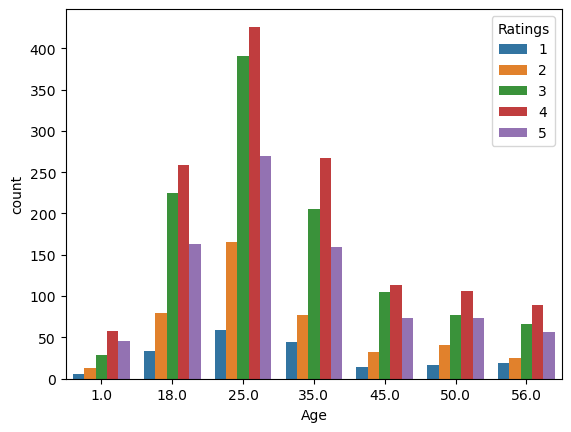

In [118]:
sns.countplot(x=data_final['Age'],hue=data_final['Ratings'])

In [122]:
data_final.head()

,MovieIDs,MovieName,Genre,ID,MovieID,Ratings,UserID,Gender,Age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,0.0,1.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0


In [123]:
input=data_final.drop(['Ratings','MovieName','Genre','MovieIDs'], axis=1)
movie_target=data_final['Ratings']

In [124]:
movie_target.head() 

0    5
1    3
2    3
3    4
4    5
Name: Ratings, dtype: int64

In [125]:
input.head()

,ID,MovieID,UserID,Gender,Age
0,1,1193,1.0,0.0,1.0
1,1,661,2.0,1.0,56.0
2,1,914,3.0,1.0,25.0
3,1,3408,4.0,1.0,45.0
4,1,2355,5.0,1.0,25.0


In [126]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input)
scaled_df = pd.DataFrame(scaled_data,
                         columns=input.columns)
scaled_df.head()

,ID,MovieID,UserID,Gender,Age
0,0.0,0.301696,0.000000,0.0,0.000000
1,0.0,0.167046,0.000258,1.0,1.000000
2,0.0,0.231081,0.000515,1.0,0.436364
3,0.0,0.862313,0.000773,1.0,0.800000
4,0.0,0.595799,0.001030,1.0,0.436364


# Training data &Testing data

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(input,movie_target,test_size=0.3)

In [129]:
print(Y_train)

2877    5
1306    4
1909    4
618     3
3268    3
       ..
3588    3
879     3
2292    4
1954    5
1946    5
Name: Ratings, Length: 2718, dtype: int64


In [130]:
print(Y_test)

2557    3
1849    4
2904    3
3602    4
3394    4
       ..
1843    5
653     5
2684    4
3541    4
1905    4
Name: Ratings, Length: 1165, dtype: int64


# Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\tejith\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
X_test = np.array(X_test)

In [133]:
model.predict(X_test)


C:\Users\tejith\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([4, 4, 4, ..., 4, 3, 4], dtype=int64)